# Neural Networks (LTAT.02.001) project

Topic: Predict if the bus is leaving the bus stop

Team members: Märt Häkkinen, Anne Ott, Linnet Puskar Liis Simmul

Working with 567 sets of images
Working with 51999 images
Image examples: 
rear_signal_dataset/20160805_g1k17-08-05-2016_15-57-59_idx99/20160805_g1k17-08-05-2016_15-57-59_idx99_BOO/20160805_g1k17-08-05-2016_15-57-59_idx99_BOO_00002671/light_mask/frame00002671.png


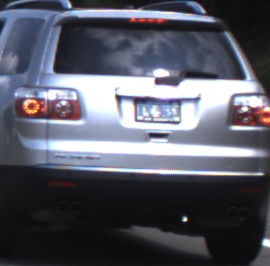

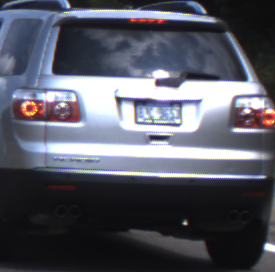

rear_signal_dataset/20160805_g1k17-08-05-2016_15-57-59_idx99/20160805_g1k17-08-05-2016_15-57-59_idx99_BOO/20160805_g1k17-08-05-2016_15-57-59_idx99_BOO_00002671/light_mask/frame00002672.png


In [5]:
import os
from IPython.display import Image as _Imgdis

difficulty = "Easy"

dataset_folder = "rear_signal_dataset"
X_train = []
image_count = 0


labels = []

with open("{0}/{1}.txt".format(dataset_folder, difficulty)) as f:
    content = f.readlines()
    for folder in content:
        # Load the data
        folder_components = folder.split("_")
        folder_components[-1] = folder_components[-1][:-1]
        base = str("_".join(folder_components[:-2]))
        folder = "{0}/{1}/{2}".format(dataset_folder, base, (base + "_" + str(folder_components[-2])))
        folder += "/" + (str("_".join(folder_components)))
        folder += "/light_mask"
        images = [folder + "/" + f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
        image_count += len(images)
        X_train.append({
            "images": images,
            "label" : folder_components[-2]
        })


print("Working with {0} sets of images".format(len(X_train)))
print("Working with {0} images".format(image_count))
print("Image examples: ")

for i in range(0, 2):
    print(X_train[0]["images"][i])
    display(_Imgdis(filename=X_train[0]["images"][i], width=240, height=320))

In [8]:
import cv2
import numpy as np
cap = cv2.VideoCapture("vtest.avi")

frame1 = cv2.imread(X_train[0]["images"][0])
print(type(frame1))
prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[...,1] = 255

for image in X_train[0]["images"][1:]:
    frame2 = cv2.imread(image)
    next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
    print(type(frame2))

    flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)

    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
    hsv[...,0] = ang*180/np.pi/2
    hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
    rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)

    cv2.imshow('frame2',rgb)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
    elif k == ord('s'):
        cv2.imwrite('opticalfb.png',frame2)
        cv2.imwrite('opticalhsv.png',rgb)
    prvs = next

cap.release()
cv2.destroyAllWindows()

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


error: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\video\src\optflowgf.cpp:1114: error: (-215:Assertion failed) prev0.size() == next0.size() && prev0.channels() == next0.channels() && prev0.channels() == 1 && pyrScale_ < 1 in function 'cv::`anonymous-namespace'::FarnebackOpticalFlowImpl::calc'
